# Assignment 8: Moving Beyond Linearity

Dataset(s) needed:
Hitters data frame of the ISLR library SF-DAT-21. In this assignment, we're going to predict Salary based on Hits as the only independent variable.

In [73]:
import pandas as pd

train = pd.read_csv('Hitters.csv')
train.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


#### Replace missing values in the dataset by the mean

In [74]:
sal_mean = train['Salary'].mean()
train['Salary'] = train['Salary'].fillna(sal_mean)

#### Graph a scatter plot to visualize the relationship between Hits and Salary

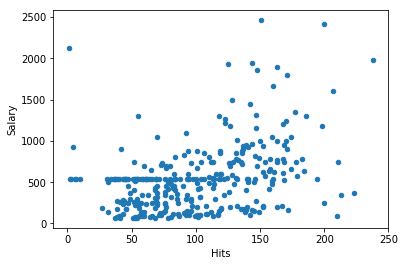

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

train.plot.scatter(x='Hits',y='Salary')

#### Apply Linear Regression on the Hitters data to predict 'Salary' depending only on 'Hits' as the independent variable. Print out the slope and intercept coefficients.

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# TODO: Split the data into 70/30 train/test datasets
X = train['Hits'].values.reshape(-1, 1)
y = train['Salary'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
# TODO: Fit linear regression model
lr = LinearRegression()
lr = lr.fit(X_train,y_train)
# TODO: print the slope and intercept
print('Intercept: {}  Slope:{}'.format(lr.intercept_[0].round(3),lr.coef_[0][0].round(3)))

Intercept: 178.885  Slope:3.502


#### Compute the RMSE of the model obtained above

ValueError: x and y must be the same size

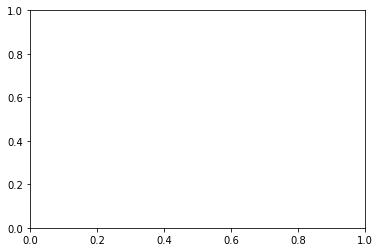

In [86]:
from sklearn.metrics import mean_squared_error
from math import sqrt

preds = lr.predict(X_test)
lr_mse = mean_squared_error(y_test,preds)
lr_rmse = sqrt(lr_mse)
lr_res = y_test - preds

#Compute the RMSE 
print("RMSE:",lr_rmse)

#### Graph the linear regression model obtained on the data

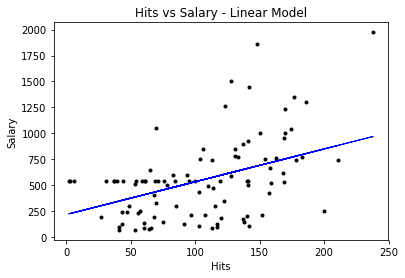

In [78]:
plt.scatter(X_test, y_test,  color='black',marker='.')
plt.plot(X_test, preds, color='blue', linewidth=1)

# plt.xticks(())
# plt.yticks(())
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.title('Hits vs Salary - Linear Model')

plt.show()

#### Construct a polynomial regression model with degree 2 to predict 'Salary' depending only on 'Hits' as the independent variable. Compute the RMSE and Plot your result.

RMSE: 350.20640196810893


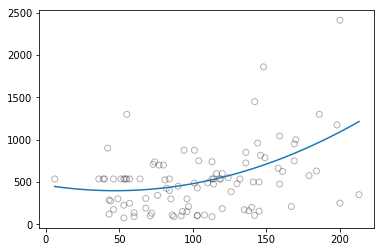

In [79]:
import numpy as np

X = train['Hits'].values
y = train['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

# Generate weights for polynomial function with degree 2
weights = np.polyfit(X_train,y_train,2)

# Generate model with the given weights
poly_model = np.poly1d(weights)

# Prediction on test set
pred = poly_model(X_test)
poly_res = y_test - pred
# Compute the RMSE
poly_mse = mean_squared_error(y_test,pred)
poly_rmse = sqrt(poly_mse) 
print("RMSE:",poly_rmse)

# Plot the visualisation
poly_regr = np.linspace(X_test.min(),X_test.max())
plot = poly_model(poly_regr)

plt.scatter(X_test,y_test,facecolor='None',edgecolor='k',alpha=0.3)
plt.plot(poly_regr,plot)
plt.show()

####  Create a cubic spline with 3 knots at 40, 100 and 150


RMSE: 383.05122042547515


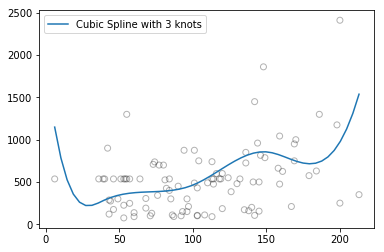

In [80]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate a cubic spline with 3 knots at 40, 100 and 150
transformed_x = dmatrix("bs(X_train,knots=(40,100,150),degree=3,include_intercept=False)")

# Fit a generalized linear models on the transformed dataset
fit_glm = sm.GLM(y_train, transformed_x).fit()

# Prediction
pred_glm = fit_glm.predict(dmatrix("bs(X_test,knots=(40,100,150),include_intercept=False)",{"train": X_train},return_type='dataframe'))
spline_res = y_test - pred_glm
# Compute the RMSE 
spline_mse = mean_squared_error(y_test,pred_glm)
spline_rmse = sqrt(spline_mse) 
print("RMSE:",spline_rmse)

# Plot the visualisation
lin = np.linspace(X_test.min(),X_test.max())
pred_glm = fit_glm.predict(dmatrix("bs(xp,knots=(40,100,150),include_intercept=False)",{"xp": lin},return_type='dataframe'))

plt.scatter(X_test,y_test,facecolor='None',edgecolor='k',alpha=0.3)
plt.plot(lin,pred_glm,label="Cubic Spline with 3 knots")
plt.legend()
plt.show()

#### Create a natural cubic spline on the data to predict 'Salary' based on 'Hits'

360.5602025002263


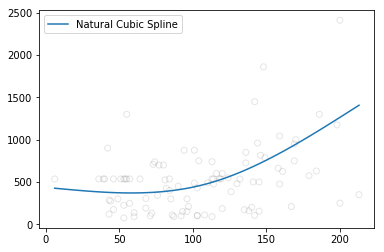

In [81]:
# Generate natural cubic spline
transformed_x = dmatrix("cr(X_train,df=3)",{"train":X_train},return_type="dataframe")
fit_spline = sm.GLM(y_train,transformed_x).fit()

# Compute the RMSE 
preds = fit_spline.predict(dmatrix("cr(X_test,df=3)"),{"valid": X_test})
cubic_rmse = sqrt(mean_squared_error(y_test,preds))
print(cubic_rmse)
cubic_res = y_test - preds
# Visualization
pred_spline = fit_spline.predict(dmatrix("cr(xp,df=3)",{"xp":lin},return_type="dataframe"))
# TODO: Plot the visualisation
plt.scatter(X_test,y_test,facecolor='None',edgecolor='k',alpha=0.1)
plt.plot(lin,pred_spline,label="Natural Cubic Spline")
plt.legend()
plt.show()

#### Which model performed the best?

In [90]:
def res_plot(res,mod):
    plt.scatter(y_test,res)
    plt.xlabel('Observed Salary')
    plt.ylabel('Residual')
    plt.title(mod + ' Residuals')
    plt.show()

#### As seen below, the simple linear model performs the best in terms of RMSE, but it's performance degrades severely as hits increase. The polynomial model provides the best mix of low RMSE and evenly distributed residuals.

LR RMSE: 296.5441657572


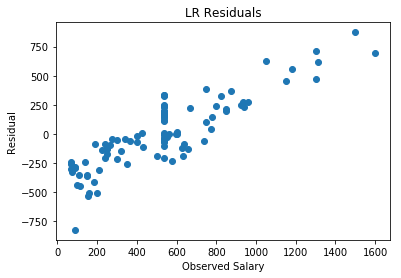

Polynomial RMSE: 350.20640196810893


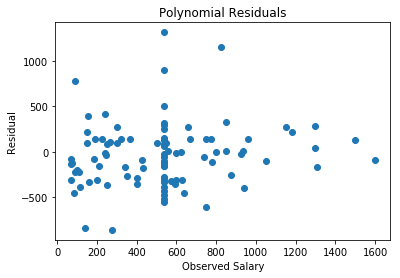

Cubic Spline RMSE: 383.05122042547515


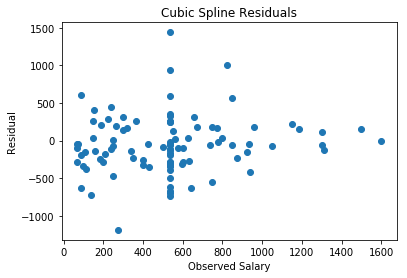

Natural Cubic Spline RMSE: 360.5602025002263


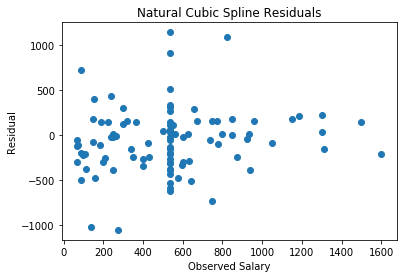

In [94]:
print('LR RMSE: {}'.format(lr_rmse))
res_plot(lr_res,'LR')
print('Polynomial RMSE: {}'.format(poly_rmse))
res_plot(poly_res,'Polynomial')
print('Cubic Spline RMSE: {}'.format(spline_rmse))
res_plot(spline_res,'Cubic Spline')
print('Natural Cubic Spline RMSE: {}'.format(cubic_rmse))
res_plot(cubic_res,'Natural Cubic Spline')